In [67]:
import warnings
warnings.filterwarnings('ignore')

# loading libraries

In [68]:
import pandas as pd
import random
from PIL import Image
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
pd.options.display.max_colwidth = 1000

# reading image labels file

In [75]:
data = pd.read_csv('../data/solution.csv')
data.columns =  ['image_path', 'label']
data.label = data.label -1
new_str = '../data/train_images/'
data.image_path = [new_str + str(x) + '.png' for x in data.image_path]

unique_classes = data['label'].unique().tolist()

label_count = pd.DataFrame(data['label'].value_counts()).reset_index()
print ('Total Images {}'.format(label_count.label.sum()))

Total Images 5000


In [76]:
data.label.value_counts() * 0.8, len(data)

(3    692.0
 4    677.6
 5    674.4
 0    668.8
 2    664.8
 1    622.4
 Name: label, dtype: float64, 5000)

# check if an image is invalid

In [24]:
import os
from PIL import Image
total_count = 0
deleted_styles = []
valid_styles = []
for path_to_image in tqdm(data.image_path):
    total_count += 1    
    try:
        Image.open(path_to_image)
        valid_styles.append(path_to_image)
    except Exception as e:
        print("deleting image :" + str(path_to_image))
        deleted_styles.append(path_to_image)

100%|██████████| 5000/5000 [00:00<00:00, 11655.21it/s]


In [26]:
print ("total images : " ,  len(data))
print ("total deleted images : " ,   len(deleted_styles) )
print ("total valid images : " ,   len(valid_styles) )

total images :  5000
total deleted images :  0
total valid images :  5000


# stratified train-test split

In [52]:
df_valid = pd.DataFrame()
df_train = pd.DataFrame()
split = 0.8
for cl in unique_classes:
    temp = data[data.label == cl ]
    np.random.seed(0)
    temp.reset_index(drop = True, inplace = True)
    train_rows = np.random.choice(temp.index, int(len(temp)* split), replace=False)
    test_rows = [x for x in temp.index if x not in train_rows]
    temp_train = temp.loc[train_rows]
    temp_valid = temp.loc[test_rows]
    df_valid = df_valid.append(temp_valid)
    df_train = df_train.append(temp_train)
    
print ('train shape {}'.format(df_train.shape))
print ('valid shape {}'.format(df_valid.shape))
print ('total shape {}'.format(data.shape))

df_train = df_train.sample(frac=1).reset_index(drop=True)
df_valid = df_valid.sample(frac=1).reset_index(drop=True)
df_train.to_csv('../data/train.txt', sep=' ', index = False, header=False)
df_valid.to_csv('../data/valid.txt', sep=' ', index = False, header=False)
# data.to_csv('../data/all_data_5.5l.txt', sep=' ', index = False, header=False)

train shape (3997, 2)
valid shape (1003, 2)
total shape (5000, 2)


# Test_df preparation

In [57]:
submission = pd.read_csv('../submissions/sample.csv')
print (submission.shape)
submission.head()

(40000, 2)


,id,category
0,1,2
1,2,3
2,3,1
3,4,2
4,5,1


In [64]:
test_images_path = '../data/test_images/'
test_df = submission.copy()
test_df.columns = ['path', 'label']
test_df.label = 0
test_df.path = [test_images_path  + str(x) + '.png' for x in test_df.path]
print (test_df.shape)
test_df.head()

(40000, 2)


,path,label
0,../data/test_images/1.png,0
1,../data/test_images/2.png,0
2,../data/test_images/3.png,0
3,../data/test_images/4.png,0
4,../data/test_images/5.png,0


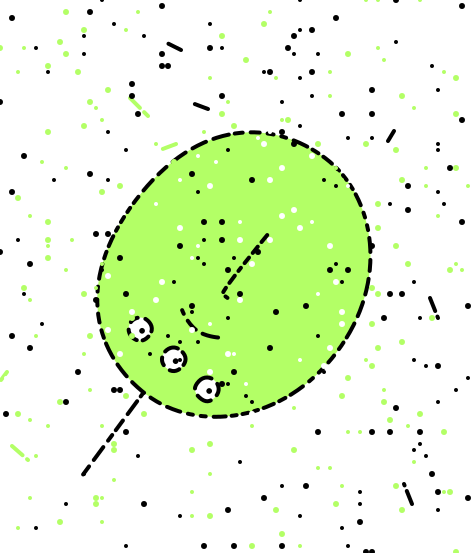

In [65]:
img = test_df.path.tolist()[75]
Image.open(open(img, 'rb'))

# saving test file

In [66]:
test_df.to_csv('../data/test.txt', sep=' ', index = False, header=False)